# Random Forests

Based on code example of "An Introduction to Machine Learning with Python" by A.C. Muller and S. Guido (O'Reilly).
Adapted by M. Eirinaki.


In this example you will see how we can use the RandomForestClassifier library. 

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import mglearn #helper library
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

### Visualizing Random Forests

We start by creating a sample dataset ('two moons' dataset). We apply a random forest consisting of five trees to visualize the process. 

In [2]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

#apply random forests classifier to dataset. 
#Use n_estimators parameter to define the size of the forest
forest = RandomForestClassifier(n_estimators=5, random_state=2)

#The trees that are built are stored in the estimator_ attribute.
forest.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

We visualize the decision boundaries learned by each tree, together with their aggregate prediction as made by the forest. 

Notice that the decision boundaries are very different, even for such a small dataset. 
Notice also that each tree misclassifies some instances (due to them not being part of the input sample as the random forests classifier uses bootstrapping). 

See how the random forest overfits much less than any of the individual trees, even for such a small dataset and number of trees in the ensemble. In practice, we should use many more (100s or 1000s) of trees, and this will lead to even smoother boundaries.

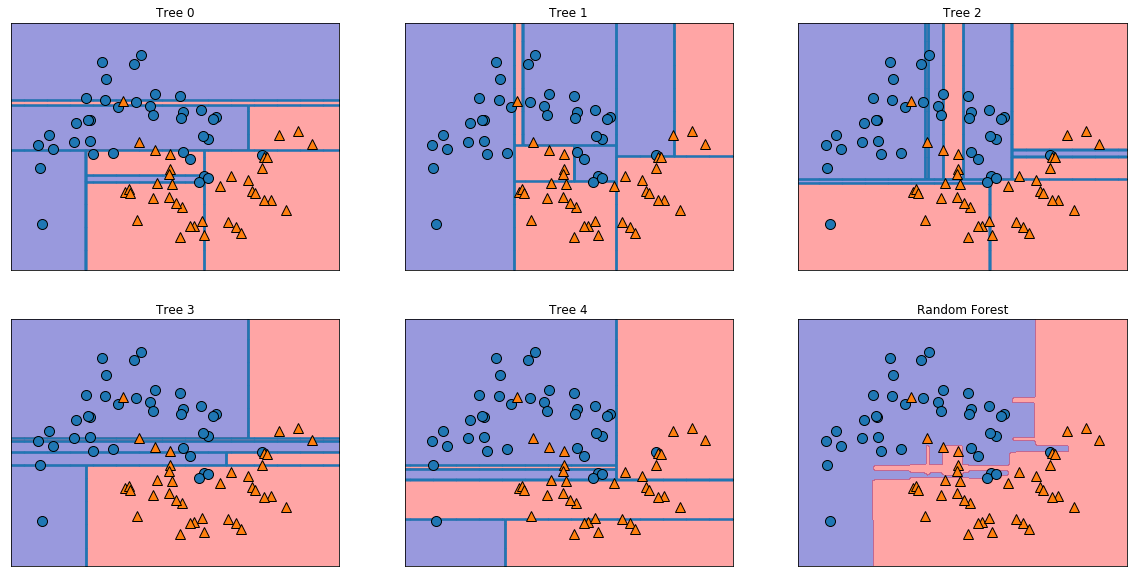

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

### Using Random Forests

For this example we will use the breast cancer dataset, which is the same we used in the decision trees example.

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)



#Start by creating 100 trees. This is defined by the n_estimators parameter
forest = RandomForestClassifier(n_estimators=100, random_state=0) #try changing the number of features or max depth
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972




You might recall that the decision tree classifier was giving us less accuracy for the test set (around 0.94). Remember that the current implementation is actually Bagging, as we have not set the number of features to use for the split (by setting the max_features parameter).
We also have not applied prepruning (through max_depth). However, even with the default settings for these two parameters, the classifier provides very satisfactory results. 


Finally, let's plot the importance of each feature, computed by aggregating the feature importances over all the trees in the forest. 

Notice how many more important features are identified, when compared to the ones we found using a Decision Tree classifier. 

Text(0.5,0,'Feature importance')

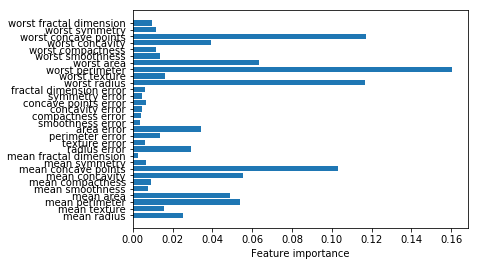

In [8]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")